# Bachelorproject

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.gmm import IV2SLS
plt.style.use('ggplot')
#pd.set_option('max_rows',200) 
pd.set_option('display.float_format', '{:.4f}'.format) # Set decimals 


# Plot choices
sns.set(style="whitegrid")

# Scatterplot for Marketshares

(11549, 47)


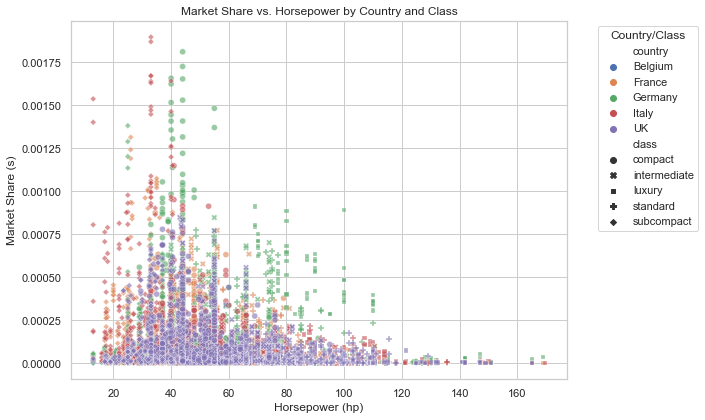

In [2]:
# Import data
cars = pd.read_csv('cars.csv')

print(cars.shape)

#Market Share Calculation: Calculated the total sales per market and year, 
#and then used these totals to calculate the market share for each car. There is also being calculated the 
#logarithm of the market share, which is a useful transformation for analysis.

#Visualization Preparation: With the data cleaned and enriched with calculated fields, 
#the visualization is ready the market shares.


cars['hp'] = cars['hp'].str.replace(',', '.').astype(float)
cars['li'] = cars['li'].str.replace(',', '.').astype(float)
cars['li1'] = cars['li1'].str.replace(',', '.').astype(float)
cars['li2'] = cars['li2'].str.replace(',', '.').astype(float)
cars['li3'] = cars['li3'].str.replace(',', '.').astype(float)
cars['ngdp'] = cars['ngdp'].str.replace(',', '.').astype(float) # National GDP
cars['rgdp'] = cars['rgdp'].str.replace(',', '.').astype(float) #Regional GDP
cars['princ'] = cars['princ'].str.replace(',', '.').astype(float) #Price/Income - pris med inflation
cars['pr'] = cars['pr'].str.replace(',', '.').astype(float)
cars['tax'] = cars['tax'].str.replace(',', '.').astype(float)
cars['avdexr'] = cars['avdexr'].str.replace(',', '.').astype(float)
cars['ac'] = cars['ac'].str.replace(',', '.').astype(float) #acceleration
cars['le'] = cars['le'].str.replace(',', '.').astype(float) #length
cars['sp'] = cars['sp'].str.replace(',', '.').astype(float) #speed
#cars['we'] = cars['we'].str.replace(',', '.').astype(float) #weight






labs = pd.read_csv('labels_values.csv')
dict_varnames = pd.read_csv('labels_variables.csv').set_index('variable').to_dict()['label']

# to translate market indices to names of countries 
labs.index += 1 
dict_ma = labs.market.dropna().to_dict()



#'qu_total': Total sales, 'qu,' for each market, 'ma' and year, 'ye'.
cars['qu_total'] = cars.groupby(['ma','ye'])['qu'].transform('sum')
cars['qu_total'] = cars['qu'].sum()

#'s': Market share is the relation between'qu' and 'qu_total'
#Quantity of goods/the total quantity
cars['s'] = cars['qu'] / (cars['qu_total'])

cars['log_s'] = np.log(cars['s']) #måske /(0.5)

cars['country'] = cars['ma'].map(dict_ma)

dict_cla = labs.classs.dropna().to_dict()
cars['class'] = cars['cla'].map(dict_cla)


# Set the figure size for the scatterplot
plt.figure(figsize=(10, 6))



# Create a scatterplot with, in this case horsepower, as the x-axis and market share as the y-axis.
# 'hue' assigns different colors to different countries, making it easier to distinguish between them.
# 'style' assigns different markers to different car classes, adding another layer of differentiation.
# 'alpha' sets the transparency of the points, making the plot easier to read when points overlap.
sns.scatterplot(data=cars, x='hp', y='s', hue='country', style='class', alpha=0.6)

# Set the title of the plot
plt.title('Market Share vs. Horsepower by Country and Class')

# Set the label for the x-axis
plt.xlabel('Horsepower (hp)')

# Set the label for the y-axis
plt.ylabel('Market Share (s)')

# Place a legend on the plot. 'bbox_to_anchor' and 'loc' help position the legend outside the plot area.
plt.legend(title='Country/Class', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()



# Deskriptive:
# korrelere mod attributes og prices - prisen er korrileret med fejlledet (lædersædder osv)
# Vises med de korrilerbar attributes, så også med de 
# Udlader en varaible:
# Prisen er endogen da de simultant bestemt
# Fejlledet er korreleret med prisen, så vi prøver at estimere alpha alligevel med instrumentvariable:
# endogenitet: så prøver vi at korrelere fejlledet, men ingen data for det
# Potentielle attributes for fejlledet (lædersæder osv.) er korreleret med prisen og kan skabe et endogenitetsproblem

# Næste step: Hvorfor er priserne endogene (prisen påvirkes af faktorer i for modellen og 
# påvirker afhængige variabel, herunder market share)
    # De kan påvirkes, 
# Styr på figurerne
# Komme i bund med Anders' slides
# Vi har fundet alpha i anders' slides
# Prices and attributes for OLS
# 5 regressioner: en kun med prices, derefter en selected attribute
# Forklarende variable, med model dummy (Brands, mm.) - sm models
# Får en masse estimater ud som skal prøves at forklares
# Log_s mod s and p => herfra estimere med IV, herunder have instrumenter (BLP beskriver summen)
# summen af attributes 

#diskriptivt - linear analyse

- Lave et loop så man kan se over forskellige variable/attributes
- Marketshare mod flere attributes
- Måske i sub plots
- Måske log_marketshares
- Lave flere forskellige forskellige plots for hvert land

# Creating a Histogram for Horsepower Distribution Across All Countries

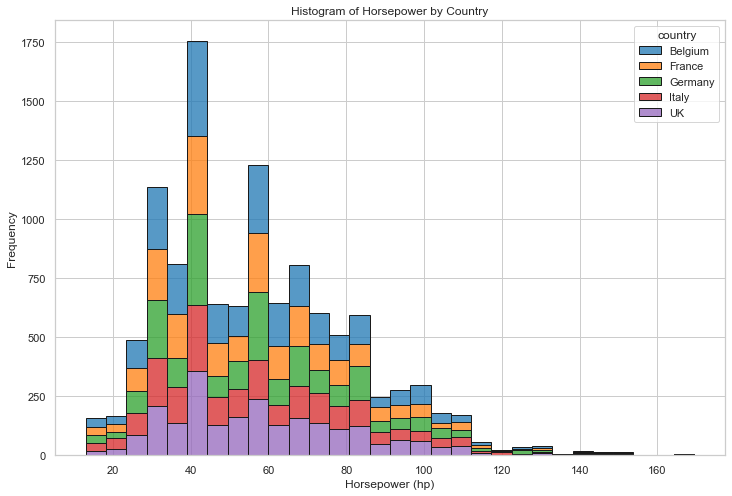

In [3]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a combined histogram with the 'hue' parameter to differentiate by country
sns.histplot(data=cars, x='hp', hue='country', multiple='stack', bins=30, palette='tab10', edgecolor='k')

# Set titles and labels
plt.title('Histogram of Horsepower by Country')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


- Fordeling af horsepower i hvert land, 
- Alle biler folk ejer, mere retvisende billede
- Market_shares for horsepowers så man kan se det
- princs, we, le, ...
- Summe market_shares indenfor hvert interval


Denne graf viser et histogram over hestekraft (hp) fordelt på forskellige lande. Hver farve repræsenterer et land, og højden af de farvede søjler indikerer antallet af bilmodeller (frekvens) inden for et specifikt interval af hestekraft. For eksempel kan en høj søjle for Frankrig i intervallet 60-80 hp indikere, at der er mange franske bilmodeller med hestekræfter i dette område. Histogrammet giver et visuelt overblik over fordelingen af bilmodellers hestekræfter i de forskellige lande.

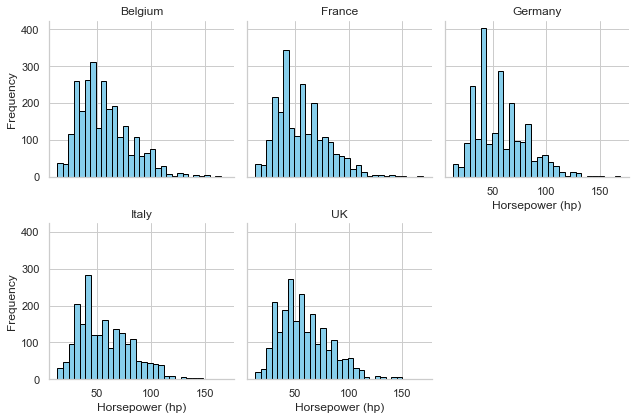

In [4]:
# Set up the FacetGrid with seaborn
g = sns.FacetGrid(cars, col='country', col_wrap=3, sharex=True, sharey=True)

# Map the histograms to the FacetGrid
g.map(plt.hist, 'hp', bins=30, color='skyblue', edgecolor='black')

# Add titles and labels
g.set_titles('{col_name}')
g.set_axis_labels('Horsepower (hp)', 'Frequency')

# Adjust the layout so that titles and labels don't overlap
g.tight_layout()

# Show the plot
plt.show()


# Average market share for each horsepower category per country

<Figure size 1008x504 with 0 Axes>

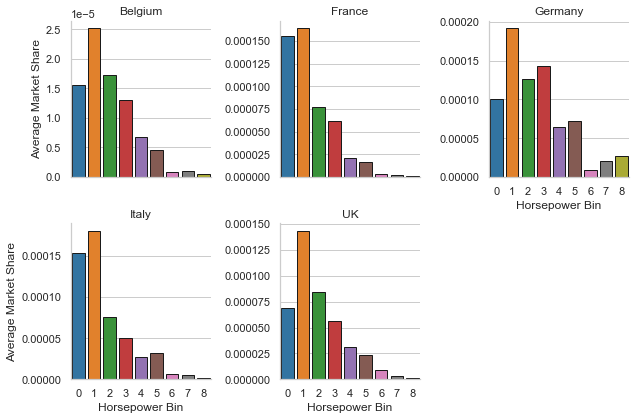

In [5]:
# Define the number of bins for horsepower
bins = np.linspace(cars['hp'].min(), cars['hp'].max(), num=10)

# Assign each car to a horsepower bin
cars['hp_bin'] = pd.cut(cars['hp'], bins, labels=np.arange(len(bins)-1))

# Group by country and horsepower bin, then calculate the average market share
avg_market_share = cars.groupby(['country', 'hp_bin'])['s'].mean().reset_index()

# Now plot the average market share for each country and horsepower bin as a bar plot
plt.figure(figsize=(14, 7))

# Because there are multiple countries and horsepower bins, we may choose to facet by country
# to make the plot clearer
g = sns.FacetGrid(avg_market_share, col='country', col_wrap=3, sharey=False)
g.map_dataframe(sns.barplot, x='hp_bin', y='s', palette='tab10', edgecolor='k')
g.set_axis_labels('Horsepower Bin', 'Average Market Share')
g.set_titles(col_template='{col_name}')

plt.show()


Forholde sig mere til figurerne:
- Tyskland kører på flest hestekrafter, mens frankrig og italien kører på dem med lavest. 

# Step 1: Creating a Histogram for Horsepower Distribution

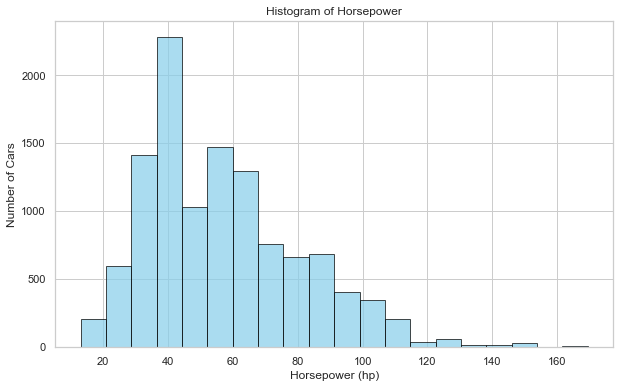

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(cars['hp'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Horsepower')
plt.xlabel('Horsepower (hp)')
plt.ylabel('Number of Cars')
plt.show()

Lave figur note her
- Hvad ser vi på figuren
    - Number of cars?
    - Forklare hvordan det er lavet
    - Aggregere forskellige models for horsepower
    - Selvfoklarende tabel
    - Færre bins (bins=20)

# Step 2: Creating a Binned Scatter Plot for Average Horsepower


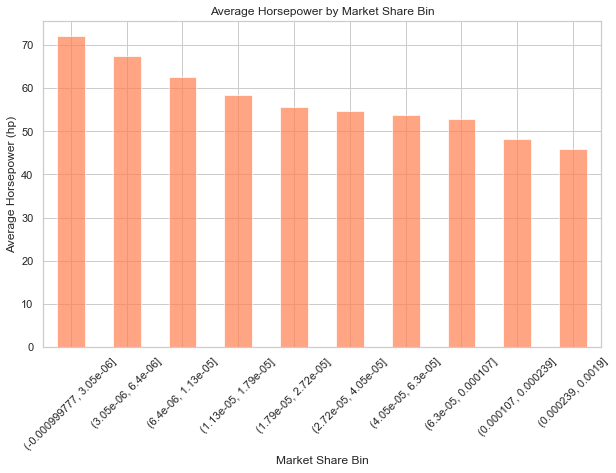

In [7]:
# Bin the market share data
cars['market_share_bin'] = pd.qcut(cars['s'], q=10, duplicates='drop')  # Creating 10 quantile-based bins

# Calculate the average horsepower for each bin
avg_hp_per_bin = cars.groupby('market_share_bin')['hp'].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_hp_per_bin.plot(kind='bar', color='coral', alpha=0.7)
plt.title('Average Horsepower by Market Share Bin')
plt.xlabel('Market Share Bin')
plt.ylabel('Average Horsepower (hp)')
plt.xticks(rotation=45)
plt.show()


- Summe her også
- Binn scatter
    - x og y, laver bins, gennemsnittet for hvert bin
    - Summe marketshares på x aksen og horsepower på yaksen

Figuren viser et histogram, der repræsenterer gennemsnitlig hestekraft (hp) opdelt i forskellige intervaller af markedsandel (s). Hver søjle repræsenterer det gennemsnitlige antal hestekræfter for biler inden for et specifikt interval af markedsandele. Dette kan hjælpe med at forstå, hvordan hestekraften fordeler sig over biler med forskellige markedsandele; for eksempel kan det indikere, om biler med højere hestekraft tendens til at have større eller mindre markedsandel.

# Calculating Average Horsepower by Year


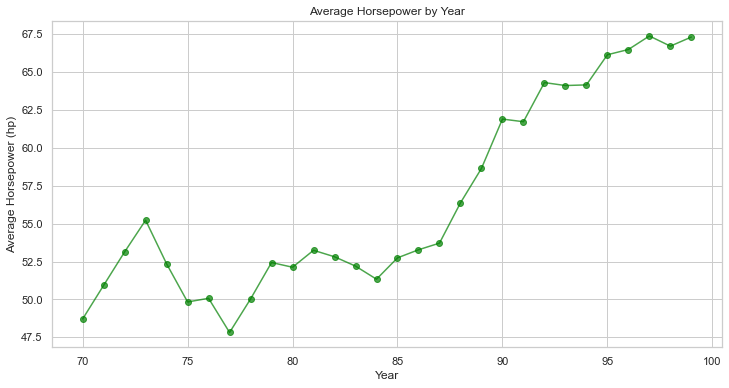

In [8]:
# Group by year and calculate the average horsepower
avg_hp_per_year = cars.groupby('ye')['hp'].mean()

# Plotting the average horsepower over years
plt.figure(figsize=(12, 6))
avg_hp_per_year.plot(kind='line', marker='o', color='green', alpha=0.7)
plt.title('Average Horsepower by Year')
plt.xlabel('Year')
plt.ylabel('Average Horsepower (hp)')
plt.grid(True)
plt.show()


- Average over forskellige alle brands
- Lave et vægtet gennemsnit så det er for lamboginier og toyotaer for sig kan man sige
- Alt vægtes med marketshares
- Manuelt regne ud evt. 

Denne figur viser en tidsserie for gennemsnitlig hestekraft (hp) for bilmodeller fra år til år. Fra grafen kan man se en generel stigende trend i hestekraft fra omkring 1970 til 1998, hvilket indikerer, at bilmodeller i gennemsnit er blevet mere kraftfulde over tid.

# Plotting Price Development for Selected Brands


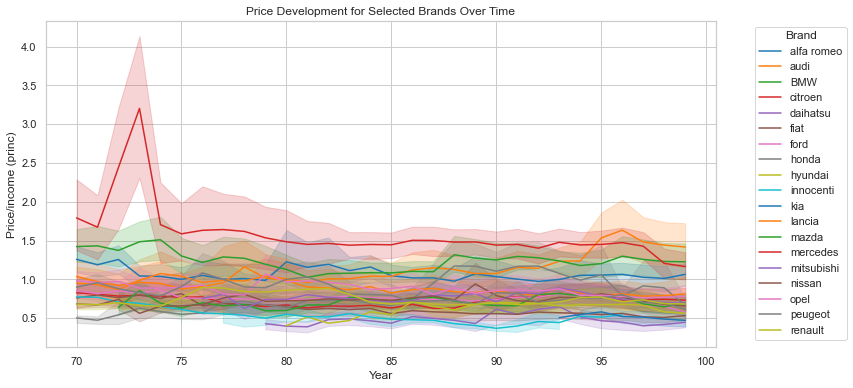

In [9]:
# Correctly handle infinite and missing values before any manipulation
cars.replace([np.inf, -np.inf], np.nan, inplace=True)

# Filter the dataset for selected brands
selected_brands = cars[cars['brand'].isin(['alfa romeo', 'audi', 'BMW', 'citroen', 'daihatsu', 'fiat', 
                                           'ford', 'honda', 'hyundai', 'innocenti', 'kia', 'lancia', 'mazda', 'mercedes',
                                           'mitsubishi', 'nissan', 'opel', 'peugeot', 'renault'])] # Check brand names for accuracy

# Create a line plot showing the development of prices over years for the selected brands
plt.figure(figsize=(12, 6))
sns.lineplot(data=selected_brands, x='ye', y='princ', hue='brand', palette='tab10')  # Adjusted for a better color palette
plt.title('Price Development for Selected Brands Over Time')
plt.xlabel('Year')
plt.ylabel('Price/income (princ)')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

# Show the plot
plt.show()

#Kigge på mercedes - måske fjerne for den ene obs.
#Se om der er taget gennemsnit - mere præcis 
#sns - rigtige library?
#Begrunde spiken - evt. noget valuta - 

#De andre papers, for det diskriptive, startanalyse
#andre papers:
#1. intro
#2. market caracteristics
#3. diskriptive - 
#Estimere attributes - Hvilke enheder - korrelere priser med attributes, prisen alene er ikke nok som variable


- BMW har stor (95% af markedet) og lille (5%)
    - Den store har højere price income ration
        - Og price
    - De tæller ikke lige meget
    - Tage 5% gange price/income lille + 95%*price/income stor
    - Skaber en market share rate
    - (Vægtet gennemsnit)
- Være mere selektiv hvis det er
    - For 5-10 største brands
        - Mindre støj
- Price/income og price ratio
    - Graf for hver

# Plotting Price Development for All Brands Over Time

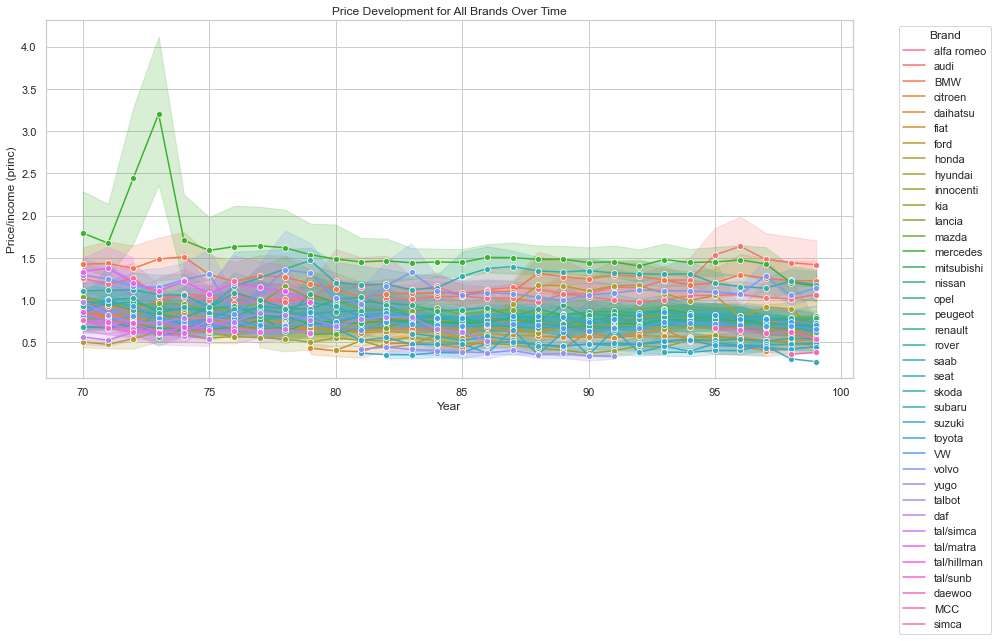

In [10]:
# Create a line plot showing the development of prices over years for all brands
plt.figure(figsize=(14, 8))
sns.lineplot(data=cars, x='ye', y='princ', hue='brand', marker='o', legend='full')
plt.title('Price Development for All Brands Over Time')
plt.xlabel('Year')
plt.ylabel('Price/income (princ)')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()

#lave nogle grafer for at se hvad der er i variablerne - variable over tid
#Giver det mening at tage pris/indkomst (lokal valuta) på tværs af lande (med inflation) - læse verbovens paper mm. for hvilke mål
#Enheden i prices
#Faste og løbende priser - inflation => rene priser= fjerne inflation samt
#Giver det mening med priser for brands


# Using regplot for a Single Scatterplot with Regression Line


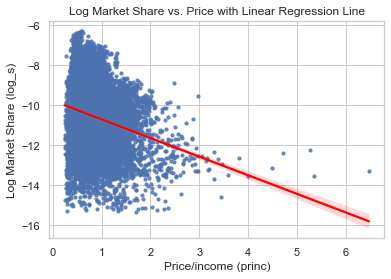

In [11]:
#regplot is a seaborn function for plotting a regression line for two variables along with a scatterplot. 
#It is a simpler function that is good for quick, straightforward plots.

# Use seaborn's regplot to create a scatterplot of 'pr' vs. 'log_s'.
# 'x' specifies the data for the x-axis (Price in this case).
# 'y' specifies the data for the y-axis (Log Market Share in this case).

sns.regplot(x='princ', y='log_s', data=cars, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Set the title of the plot with plt.title.
plt.title('Log Market Share vs. Price with Linear Regression Line')

# Set the label for the x-axis with plt.xlabel.
plt.xlabel('Price/income (princ)')

# Set the label for the y-axis with plt.ylabel.
plt.ylabel('Log Market Share (log_s)')

# Display the plot with plt.show().
plt.show()


#Variationen skyldes attributes og uobserverede mm. målefejl
#


#Noter til næste gang:
#Beskrive hvad delkonklusionerne viser - 100% styr på grafer

#Negativ sammenhæng for 2 variable - finde ud af med flere
#Estimere attributes

Den er vigtig den her 
- Præcis det vi gør med vores data
- Lad os lav'e flere af dem her
    - Nøglen til opgaven
    - Hvad hvis vi gjorde det for forskellige lande
    - Kontrollere for attributes også (hvis man kan)
- Man kunne måske lave bin scatter plot
    - Regne betinget gennemsnit af market shares indenfor nogle kategorier
        - Gennemsnittet af marketshares
        - Behøver måske ikke at være lineær
        - Den sidste linjes konfidensinterval holder ikke helt (måske)
        - Måske kigge på standardfejlen derude

**Prisfølsomhed**: Det antyder, at der er prisfølsomhed på markedet. En **højere pris i forhold til indkomst** kan gøre en bil **mindre attraktiv for forbrugerne**, hvilket fører til en **lavere markedsandel**.

**Indkomsteffekt**: Hvis princ repræsenterer prisen på en bil i forhold til gennemsnitsindkomsten, så som **biler bliver dyrere i forhold til forbrugernes indkomst**, kan **færre mennesker have råd til dem**, hvilket resulterer i en **lavere markedsandel**.

**Substitutionseffekt**: Når prisen på en bil stiger, kan forbrugerne skifte til alternative mærker eller modeller, der tilbyder bedre værdi for pengene, hvilket igen fører til en lavere markedsandel for de dyrere muligheder.

**Efterspørgselens elasticitet**: Den **negative korrelation** kan afspejle **efterspørgselens elasticitet for biler**. Biler kunne være et relativt elastisk gode, hvilket betyder, at **efterspørgslen ændrer sig betydeligt med prisændringer**.

# Integrate this into the regression setup - Only with prices

**Alpha-værdien i en OLS-regressionsmodel**: 
- I regressionstabbeln nedenfor bliver alpha-værdien angivet som koefficienten for 'const' og er -5.1796. Det betyder, at **når prisen og alle andre uafhængige variabler er nul, er den forventede logaritmiske markedsandel -5.1796**.
- Er koefficienten for konstantleddet, som repræsenterer det punkt, hvor regressionslinjen skærer y-aksen, når alle uafhængige variabler er nul. 

**Den uafhængige variabel i din model er prisen ('pr')**
- Koefficient = -1.435e-08. Dette indikerer, at for hver stigning i pris, forventes den logaritmiske markedsandel at falde med -1.435e-08, mens alle andre faktorer holdes konstante. Dette afspejler den **negative sammenhæng mellem pris og markedsandel**; (som også er vist tidligere). 

In [14]:
# Replace 'pr', 'hp' etc., with the actual attribute names you want to include
cars['princ'] = pd.to_numeric(cars['princ'], errors='coerce')
# Convert additional attributes as needed

# Replace any infinite values with NaN and then drop rows with NaN values in these columns
cars.replace([np.inf, -np.inf], np.nan, inplace=True)
cars.dropna(subset=['princ'], inplace=True)  # Include all your predictor columns in the subset list

# Prepare your independent variables DataFrame including the constant and other variables
X = cars[['princ']]  # I can add more attributes if it is needed
X = sm.add_constant(X)

# Define your dependent variable
y = cars['log_s']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of your regression model
print(model.summary())

print(cars.shape)

# Evt. nye tal da det er ændret til princ


                            OLS Regression Results                            
Dep. Variable:                  log_s   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4001
Date:                Sat, 25 May 2024   Prob (F-statistic):              0.527
Time:                        11:18:11   Log-Likelihood:                -1415.9
No. Observations:                1000   AIC:                             2836.
Df Residuals:                     998   BIC:                             2846.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0228      0.062      0.367      0.7

In [15]:
print(cars.columns)

Index(['princ', 'log_s', 'bin'], dtype='object')


Konstanten er startpunktet - Det matcher perfekt med grafen foroven
- Hældningen er princ
    - Negativ sammenhæng mellem pris og market share
        - Går price/income op, falder market share

I regressionstabellen med fokus på prisen ser vi følgende:

- **Konstanten i modellen**: D
    - Forkert, der er bare attributes and prices
    - Nytten af outside good er 0
        - Normalisering, som bliver fanget af konstanten
- princ:
    - Priscoefficienten er alpha
    - Ingen beta da der ikke er nogen x'er

- **R-kvadreret (R-squared)**: Dette tal viser, **hvor stor en del af variationen i logaritmisk markedsandel vores model kan forklare**. Med en værdi på 0.05 forklarer modellen en okay del
    - Adjusted
        - Forklarende variable
            - 1000 variable som ikke gør noget bliver den lavere

- **Koefficient (coef)**: Tallet ved 'pr' viser ændringen i logaritmisk markedsandel for hver ændring i pris. Med en værdi på **-1.435e-08** indikerer det, at **en stigning i pris fører til en fald i markedsandelen.**



- **Standardfejl (std err)**: Dette måler usikkerheden omkring vores koefficientestimat. En lille værdi, som her 1.74e-09, betyder, at vi er ret sikre på vores estimering af prissens effekt.

- **t-værdi**: Dette tal viser, **hvor mange standardfejl vores koefficient er fra nul**. En høj absolut værdi som -311.633 for konstanten og -8.243 for prisen tyder på en stærk effekt.
    - Coeff
    - Significant
        - Den er større end 2 da den er signifikant
        - 97,5% for dobbeltside test
    - t-værdien:
        - Numerisk større end 2, med sikkerhed afvise koefficienten er større end 2
        - Hvis 0 var konfidensinterval, var t mindre og P ...

- **P-værdi (P>|t|)**: Dette er sandsynligheden for at se en effekt som den observerede, hvis den sande effekt er nul. Da værdien er 0.000, er både konstanten og prisen statistisk signifikante.
    - Hvis 0,5 kan vi ikke afvise hypotesen

- **Konfidensinterval ([0.025, 0.975])**: Dette interval giver os en række værdier, hvor vi kan være 95% sikre på at finde den sande koefficient. For prisen ligger dette interval mellem -1.78e-08 og -1.09e-08.

- Skew:
    - Skewness er 0 for normalfordeling
        - Her er der lidt skewness

Behøver ikke vise - Lineære modeller er efficient
- Jarque test:
    - Fejlledene er normaltfordelte
        - Kurtosis burde være 3 for normalfordeling
    - Teststørerlse er store, så vi langt fra h0 (nulnypotese)
    - Prob(JB) er lille og kan afvises at det er normaltfordelt
    
    
Noten nederst i tabellen henviser til, at den meget store betingelsesnummer kan indikere et problem med multicollinearitet eller andre numeriske problemer, men da der kun er én forklarende variabel, kan dette også skyldes skalaen af de involverede variabler.

# Integrate this into the regression setup

In [16]:
# Convert all predictor variables to numeric type and handle missing/infinite values
cars['pr'] = pd.to_numeric(cars['pr'], errors='coerce')
cars['hp'] = pd.to_numeric(cars['hp'], errors='coerce')
cars['ac'] = pd.to_numeric(cars['ac'], errors='coerce')

# Replace any infinite values with NaN and then drop rows with NaN values in these columns
cars.replace([np.inf, -np.inf], np.nan, inplace=True)
cars.dropna(subset=['pr', 'hp', 'ac'], inplace=True)  # Include all the predictor columns in the subset list

# Preparing the independent variables DataFrame including the constant and other variables
X = cars[['pr', 'hp', 'ac']]  # I can add more attributes if it is needed
X = sm.add_constant(X)

# Defining the dependent (afhængige) variable
y = cars['log_s']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the summary of your regression model
print(model.summary())


# Deskriptive - linear analyse:
# korrelere mod attributes og prices - prisen er korrileret med fejlledet (lædersædder osv)
# Vises med de korrilerbar attributes, så også med de 
# Udlader en varaible:
# Prisen er endogen da de simultant bestemt
# Fejlledet er korreleret med prisen, så vi prøver at estimere alpha alligevel med instrumentvariable:
# endogenitet: så prøver vi at korrelere fejlledet, men ingen data for det
# Potentielle attributes for fejlledet (lædersæder osv.) er korreleret med prisen og kan skabe et endogenitetsproblem



# Bruge et instrumentvariabel for at kontrollere for udbud og efterspørgsel
# Det skubber efterspørgslen op og ned
# BLP instrumenterne - Hvor meget horsepower og acceleration er der allerede i markedet
# Instrumenter for prisen - De er i Anders' slides og i BLP paper
# Ideen med at finde instrument: Korreleret med prisen, men uden at være korreleret med unobserved consumer taste
# Håndterer endogeniteten der kommer grundet ligevægten fra udbud og efterspørgsel
# For at estimere bruges instrumentvariable, ligning er en reduceret form for strukturelle ligninger - både udbud og efterspørgsel - Anders' slides
# når de er estimeret finder man priskoefficienten af marginal utility (alpha og beta)
# Herfra kan man sige noget om effekten på efterspørgslen
# Se på effekten af marginal omkostninger og potentielle andre variable for marginale omkostinnger
# Kan være IV
# når man har dem, efterspørgsel og margianale omkostninger kan ligevægten findes
 


KeyError: 'pr'

Her er det pr i stedet for princ
- Positiv 
    - Prisen er endogen

OLS antagelserne for at udlede OLS estimatoren, som er konsistent via antagelserne:
- log_s = alpha*p + beta*x + epsilon
- x= horsepower and acceleration
- når man fjerner forklarende variable ryges det ud i fejlledet
    - forklarende variable korreleres med fejlled = skal være ukorrileret med fejlled
- betinget værdi af x&p =0
    - betinget middelværdi => E(epsilon|horsepower, acceleration, price) = 0 => 
        - we can estiamte alpha and beta consistently using OLS, but if horsepower is excluded from the regression, we have 
    - E(epsilon|acceleration, price) ≠ 0
        - dette er ikke længere betinget estimeret
    - Her er OLS ikke længere konsistent (jo mere data ≠ den sande værdi. Konvergere til noget forkert. Bias)
- Man kan estimere priserne uden 
- Fejlledet er korrileret af horsepower - effekt på prisen self

In [ ]:
# Liste over attributter
attributes = ['princ', 'we', 'ac', 'hp', 'le']  # Erstat med dine attributter

# Regression kun med pris
X_price = sm.add_constant(cars[['princ']])  # Antag at 'princ' er prisen
model_price = sm.OLS(cars['log_s'], X_price).fit()
print(model_price.summary())

# Loop gennem hver attribut og kør regression med pris og den pågældende attribut
for attr in attributes:
    X_attr = sm.add_constant(cars[['princ', 'we', 'ac', 'hp', 'le']])  # Tilføj attributten til modellen
    model_attr = sm.OLS(cars['log_s'], X_attr).fit()
    print(f"Regression med pris og {attr}:")
    print(model_attr.summary())
    print("\n")
    
# Køre regressionerne country by country => se om princ ryger på minus
# Det er horsepower som påvirker princ - den går fra negativ til positiv, hvilket ikke burde være rigtigt
# Lave om på estimater

**Nonrobust/Robust covarians**:
- Benytte robuste standardfejl = større tillid til de statistiske tests og konfidensintervaller for regressionskoefficienterne, selv når der er heteroskedasticitet (ikke-konstant varians af fejlleddene) eller visse typer af afhængighed mellem fejlleddene.

**Nonrobust**:
- Standardfejlene til at estimere usikkerheden for regressionskoefficienterne, er baseret på de klassiske antagelser om homoskedasticitet - variansen af fejlleddet er konstant på tværs af observationerne. 
    - Hvis disse antagelser ikke holder, kan de standardfejl, der er beregnet under "nonrobust" antagelsen, være **misvisende**.

**"Robust" covarians**: 
- Brugen af robuste standardfejl, hvor beregningen tager højde for heteroskedasticitet (ikke-konstant varians af fejlleddene) eller andre former for modelmæssige specifikationsfejl. 
    - Dette gør skønnet af **standardfejlene mere pålideligt**, når de klassiske **antagelser om OLS-modellen er brudt**.
    

**F-Test**:
- Sammenligner variansen af 2 prøver

**Log-Likelihood**:
- Hvor godt modellen passer til dataene. Det er den naturlige logaritme af sandsynligheden for at observere de givne data under den estimerede model. **En højere værdi af log-likelihood indikerer en bedre modeltilpasning.** 

# Forklarende variabler og model-dummies i OLS-regression

In [ ]:
# Tjekker for at sikre, at 'brand' kolonnen eksisterer
print(cars.columns)

# Hvis 'brand' eksisterer, opretter vi dummy-variabler
if 'brand' in cars.columns:
    cars = pd.get_dummies(cars, columns=['brand'], drop_first=True)
else:
    print("'brand' kolonnen findes ikke i DataFrame.")


In [ ]:
# Antag at 'pr' er prisen, og 'hp' er hestekræfter
X = cars[['princ', 'hp']]  # Starter med prisen og hestekræfter
X = pd.concat([X, cars.filter(regex='brand_')], axis=1)  # Tilføjer brand-dummy-variablerne
X = sm.add_constant(X)  # Tilføjer en konstant til modellen - estimere den basale værdi af den afhængige variabel, når alle de uafhængige variabler er nul. 
#Det forbedrer modeltilpasningen og sikrer mere nøjagtige og realistiske estimater.

y = cars['log_s']  # Logaritmiske markedsandel

# Kører OLS-modellen
model = sm.OLS(y, X).fit()

# Viser summary af modellen
print(model.summary())

# Hvilket brands tages der fat i her?



#Skal med ind i tabellen
# Ols, OLS med brand, OLS med ..., IV 1,2,3 (forskellige valg af instrumenter), priscoefficent hele vejen hen, product på y - Kan ikke sammenligne koeffiecienter
# Beta/sigma går ikke, hvad så? - Binary probit => 
# y* = xbeta + epsilon, N(0, siga^2) y = 1/y* (y*>0), P(y=1|x) = fordelingsfunktionen(xbeta/sigma))
# dif P(y=y|lambda) dif sigma x_k = ø(xbeta / sigma) beta_k/sigma => skal vide beta og sigma i forhold til hinanden ikke hver for sig
# /p og /x= normalisere => kun kende beta/sigma
# nederste rækker = Elasticity_own og Elasticity_cross på tværst af estimaterne til at finde, den med negativ tegn (nedadgående demand)
# - Argumentere for hvorfor den er endogen
#Kontrollere for omitted variable
# Forskellige markeder/tider osv.
# kolonne for instrumenterne også argumentere for dem - Herfra vælge den bedste - 
# Variation for at finde bedste price respons - kan også bruge det her instruemnt (Gandhi mm.)
# Kommer til sidst til en konklussion: tager et tal
# Kontrafaktiske beregninger for 5 forskellige beregniner, ændre marginale omkostninger ved benzin biler osv.


- Princ
    - Fjernet brand-variation
    - Den der er tilbage til at identificere er den indenfor brands
        - Holder brands konstant
    - Mange køber billige biler, fås en negativ priskoefficient
    - Marketshare mod princ
        - Få koefficient
        - Her er endogenitetsproblemer
            - Kvalitetsforskel
            - Indenfor hvert bilmærke
                - Identificere prisændring for hvert brand
                - Gennemsnitslige marketshares ryger ud
                    - PRisen på mercedes stiger og køber flere
                        - Positiv koefficient 
- Coef:
    - Færre end den 
    
- Kun fortolke på princ
    - 2 koefficienter
    - Brand dummies og sætte et kryds i tabellen
        - Næste ingen kryds for brand dummies
            - I stedet for at præsentere tabellen
            
            
            
Price, attributes, dummies - Yes, ***

Horsepower og Weight = Super colineære

- for 

**Noter fra Bertel:**
- Den er negativ her, variation over tid og på tværs af markeder for de enkelte modeller
- Hvis vi tager mercedes med masser horsepower, masser af luksus gear har det en høj pris
    - Er det mon udbud eller efterspørgsel - endogenitetsproblem
- Mercedes ændrer horsepower for model fixed effects
    - Mere retvisende estimat
    - Håndteret noget af endogenitetsproblem
    - Moddelere gazays som er modeleret med priserne
        - Model fixed effect og timed fixed effects

**Resultaterne fra en OLS-regression**, hvor der er inkluderet en række **dummy-variabler** for forskellige bilmarken (brands). Resultaterne af hver koefficient for de enkelte mærker giver os estimater af, hvordan tilstedeværelsen af hvert brand påvirker den logaritmiske markedsandel

**Forklare Estimaterne**: Hver koefficient i tabellen skal fortolkes individuelt. For eksempel, **hvis koefficienten for et bestemt brand er negativ og statistisk signifikant**, kan det tyde på, at biler fra dette mærke har en **lavere markedsandel end baseline-kategorien**, når alle andre faktorer er holdt konstante.

**Baseline**
- Går ud fra Baselinen er Alfa Romero da det er den første bil i datasættet (også alfabetisk)
- Vises ikke i tabellen og den kategori, hvor alle dummy-variabler ville tage værdien 0. 

# 2SLS/IV-regression

## Spørgsmål til Bertel:
- Vores t-værdier er lave for IV-regressionen => svag korrelation og ingen signifikans. Kan det passe?
- Er dette rigtigt lavet og skal vi eventuelt ændre måden vi definerer OLS på?
    - Tror ikke der er gjort brug af fixed effects, kan det så bruges?
- Hvilke kontrolvariable kunne man yderligere inkludere?
- Hvordan finder vi priserne for elasticiteterne?
- Måske få fikset OLS, og få styr på brug af elasticiteterne

**Intrumentet** => Adressere endogenitetsproblemet (forklarende variabler er korreleret med fejlleddet). 
- Relevans: Instrumentet skal være korreleret med den endogene variabel (i dette tilfælde 'princ').
- Eksogenitet: Instrumentet må ikke være korreleret med fejlleddet i din model for efterspørgsel.

**Afhængigt af forklarende variabel (princ) og uafhængight af fejlledet, så det ikke påvirker afhængige variabel log_s**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from linearmodels.iv import IV2SLS

# Log_s mod s and p => herfra estimere med IV, herunder have instrumenter (BLP beskriver summen)
# summen af attributes 

# Indlæser data
cars_IV = cars.copy()

# 'tax' er vores instrument, og vi definerer det som 'z' i datasættet
cars['z'] = cars['tax'] # Instrument for den anden producents hp?

#cars['z'] = cars['hp'].groupby(cars['type']).sum()

#Regne summen af hp for hver car type, for hvert år og hvert land
#Kigge på de to pakker

# Implementation af: p = \gamma*x1 + \phi*z + v, som er ('princ ~ x1 + z') => Første trins regression med 'z' som instrument for 'princ' 
first_stage = smf.ols('princ ~ hp + ac + we + le + z', data=cars_IV).fit(cov_type='HC3')
#Princ = eneste afhængige variable, alle de andre er uafhængige

# Tilføj de forudsagte værdier fra første trin til din DataFrame
cars_IV['princ_fitted'] = first_stage.fittedvalues
# princ_fittet => forudsagte værdier

# Vi har kun en 'Intercept' kolonne
if 'Intercept' not in cars_IV.columns:
    cars_IV['Intercept'] = 1.0
    
    
# Andet trins IV-regression, opdateret til at bruge 'log_s' som den afhængige variabel
second_stage = IV2SLS(dependent=cars_IV['log_s'],  # Opdateret til 'log_s'
                      exog=cars_IV[['Intercept', 'hp', 'ac', 'we', 'le']],  # Eksogene variabler inkluderet
                      endog=cars_IV['princ'],  # Den oprindeligt endogene variabel
                      instruments=cars_IV['z']).fit()  # 'z' er instrumentet
# Her defineres ln(q) = \beta*x1 + \alpha*p + \epsilon

# Finde ud af hvad den gør, evt. bruge OLS




# Udskriv resultaterne af andet trin
print(second_stage.summary)


print(first_stage.summary())


second_stageOLS = smf.ols('log_s ~ hp + ac + we + le + princ', data=cars_IV).fit(cov_type='HC3')

print(second_stageOLS.summary("second_stage_OLS"))


# ln(q) = \beta*x1 + \alpha*p + \epsilon
# p = \gamma*x1 + \phi*z + v. Estimere i first stage. \phi skal være signifikant, p^2 så høj som muligt
# Herefter inkludere p-har => ln(q) = \beta*x1 + \alpha*p-hat + \epsilon
# Validitet af instrument, z. Ukorrileret med fejlledet
# Den E(epsilon|z) = 0 => ligegyldigt hvad z er, epsilon = 0. Mean independent af z
# Styrke af instrument (Instrumentet z, stærkt korreleret med prisen (endogene variable)). 
# Hvis t-værdi er høj, stærkt korrileret og signifikant 
# Have noget eksogent som har impact i prisen. => hvordan ændrer efterspørgslen sig
# Instrument: BLP instrument eller andre
3
# Næste gang
# IV - kigge på øvelser
# Lave eksempler
# BLP estimates (z) - gennemsnit osv. - læse dokumentation
# Beregn elasticitet af formlerne 
# Negative priselasticiteter

Højere varians for IV - dette er normalt
- Hvordan priserne ændrer sig for instrumentet
- Stærkt korrileret med prisen, prævie IV-estimater
    - Støj = 

### Første Trin: $p = \gamma*x1 + \phi*z + v = \gamma *x_1 + \phi*z + vp =\gamma∗x_1 + \phi*z+v$

I første trin forsøger vi at estimere 'p' (prisen) ved hjælp af både eksogene variable ('x1') og vores instrument 'z' (som vi har valgt at være 'pop'). Formålet er at isolere den del af variationen i 'p', der kan forklares af 'z', uafhængigt af den direkte effekt 'z' måtte have på den afhængige variabel i andet trin. Det sikrer, at $\phi$ (effekten af 'z' på 'p') er signifikant, hvilket indikerer, at instrumentet er relevant.

### Andet Trin: $ln(q) = \beta*x_1 + \alpha*p + \epsilon = \beta*x_1 + \alpha * \hat{p} + \epsilon => ln(q) = \beta*x_1 + \alpha * \hat{p} + \epsilon$

Efter at have estimeret de forudsagte værdier af 'p' $(\hat{p})$, bruger vi disse værdier i andet trin til at estimere effekten af pris på kvantitet (logaritmen af 'q', dvs. 'log\_q' eller i vores tilfælde 'log\_s' for log market share), mens vi kontrollerer for de samme eksogene variable ($'x_1'$).


### Kontrol for Validitet og Styrke af Instrument

*   **Validitet af instrument, 'z':** For at være et gyldigt instrument, skal 'z' være ukorreleret med fejlleddet (\epsilon) i den endelige model. Det betyder, at instrumentet ikke påvirker den afhængige variabel direkte, men kun gennem den endogene variabel ('p' i dette tilfælde).
    
*   **Styrke af instrumentet:** For at vurdere styrken af 'z', kan du se på F-statistikken fra første trins regression. En høj F-værdi indikerer, at instrumentet forklarer en signifikant del af variationen i 'p', hvilket gør det til et stærkt instrument.
    

### Opsummering

For at sikre, at ovenstående punkter overholdes, skal du:

*   Kontrollere signifikansen af $\phi$ (effekten af 'z' på 'p') i første trin.
*   Vurdere F-statistikken fra første trins regression for at bekræfte instrumentets styrke.
*   Anvende de forudsagte værdier fra første trin (\hat{p}) i dit andet trin.
*   Sikre, at dit andet trin korrekt estimerer effekten af pris på kvantitet/log market share, mens du kontrollerer for eksogene variabler.

# Compare OLS and 2SLS

In [ ]:
# Create a DataFrame for the OLS results
firststage_results = pd.DataFrame({
    'Coefficient': first_stage.params,
    'Std. Error': first_stage.bse,
    't-value': first_stage.tvalues,
    'p-value': first_stage.pvalues
})

# Create a DataFrame for the 2SLS results
secondstage_results = pd.DataFrame({
    'Coefficient': second_stage.params,
    'Std. Error': second_stage.std_errors,
    #'t-value': second_stage.tvalues, #- Ingen t-værdi for IV eller hvorfor fejl?
    'p-value': second_stage.pvalues
})

# Combine the results into one DataFrame for comparison
comparison_table = pd.DataFrame({
    'OLS Coefficient': firststage_results['Coefficient'],
    '2SLS Coefficient': secondstage_results['Coefficient'],
    'OLS Std. Error': firststage_results['Std. Error'],
    '2SLS Std. Error': secondstage_results['Std. Error'],
    'OLS p-value': firststage_results['p-value'],
    '2SLS p-value': secondstage_results['p-value']
})
comparison_table

# Sammenligne med en hvor prisen er med
# tage OLS hvor log_s på venstre side
# 2SLS ukorrileret med exogene variable - ikke med prisen
# Prisen er korrileret med et instrument som er ukorrileret med fejlledet




# Godt at sammenligne OLS med IV
# Sammenligne med efterspørgselsligning (log_s mod attributes og prices med OLS)
# Se hvordan priskoefficienten ændrer sig 
#Lave en tabel med OLS, IV - kontrollere for fixed effects, forskellen på IV og OLS - Samle det hele i bunden
# - Hvad er egenpris og kryds som ekstra række - 

# Priselasticiteter

Priselasticitet for en specifik variabel $x_{ik}$ med hensyn til sandsynligheden $p_{ij}$ for at vælge alternativ $j$ givet attributterne $x_i$ er defineret som:

$$E_{i,z_{ni}} = \frac{\partial P_{ni}}{\partial z_{ni}} \frac{z_{ni}}{P_{ni}}= \frac{\partial V_{ni}}{\partial z_{ni}} P_{ni} (1-P_{ni}) \frac{z_{ni}}{P_{ni}} = \frac{\partial V_{ni}}{\partial z_{ni}} z_{ni} (1-P_{ni})$$

- $\frac{ \partial p_{ij}}{\partial x_{ik}}$
    - Absolutte ændring = Den afledte
-  Eks:
    - Ændringen er 10% point fra 40 til 50
        - dp=10
        - p=40
    - Procentvis ændring:
        - dp/p=0,25 = procentvise ændring i p
        - dz/z => procentvise ændring i z
    - Priselasticiteten er dp/p/(dz/z) = dp/dz * z/p
        - Hvor meget ændrer p sig når z ændres i nogle procent
- $V = \alpha p * \beta x$
- $z_{ni}$ 
    - pris eller attributes
- P = Marketshare
- $P_{ni} = \frac{\text{Salg af produkt i}}{\text{Total salg på markedet n}}$

In [ ]:
def utility_function(price, alpha, x, beta):
    """
    Dette er et eksempel på en nyttefunktion, hvor:
    - price er prisen på produktet
    - alpha er koefficienten for prisen
    - x er en anden attribut for produktet
    - beta er koefficienten for attributten x
    """
    return alpha * price + beta * x

def calculate_price_elasticity(price, alpha, P_ni, x=None, beta=None):
    """
    Beregner priselasticiteten for en given pris og markedsandel (P_ni).
    """
    # V_ni som alpha * price => hvis kun pris påvirker nytten direkte
    V_ni_derivative = alpha  # FOC - Den afledte af V_ni med hensyn til pris er beta_price
    z_ni = price  # Pris eller attributes
    
    # Beregn elasticiteten - formlen
    elasticity = V_ni_derivative * z_ni * (1 - P_ni)
    
    return elasticity

# Eksempel:
#alpha = -0.0273 # hp 
#alpha = -0.0203 # ac
price = -0.9308 # Taget fra OLS
P_ni = s #s = Mangler at finde markedsandeles

# Få s til at blive identificeret som markedtshare

#elasticity = calculate_price_elasticity(price, beta_price, P_ni)
#print(f"Priselasticiteten er: {elasticity}")

# alpha => 'hp' 
alpha = -0.9308 # Pris-koefficient fra OLS regressionen

average_price = cars['princ'].mean() # Antager at dette giver den gennemsnitlige pris fra dit datasæt

elasticity = calculate_price_elasticity(price, average_price, s)

print(f"Priselasticiteten for produktet er: {elasticity}")


#Prisen for et bestemt tidspunkt, toyota belgien (model) 1990 - priskoefficient
# 

# Beregn gennemsnitsprisen for brand
#average_price = cars['princ'].mean()  # Brug faktiske data for et specifikt brand, hvis nødvendigt

# Now calculate price elasticity for each brand
#cars['price_elasticity'] = alpha * cars['princ'] / cars['market_share']

# If you want the average price elasticity across all brands
#average_price_elasticity = (alpha * average_price) / cars['market_share'].mean()
#print(f"Gennemsnittet for produktet er: {average_price_elasticity}")


#Evt. nogle grafer for elasticiteterne 

## Egenpriselasticitet

Når $k=j$, er egenpriselasticiteten givet ved:

$$E_{i,z_{ni}} = \beta_{z} z_{ni} (1 - P_{ni}) $$
- V = z*beta + epsilon
- Efterspørgslen ændrer sig for hvor meget man ændrer prisen => Alle valutaer ikke i 

Dette udtrykker, hvordan sandsynligheden for at vælge et specifikt alternativ ændrer sig, når prisen på det alternativ ændres, mens alle andre priser holdes konstante.

In [ ]:
def calculate_own_price_elasticity(alpha, price, P_ni):
    """
    Beregner egenpriselasticiteten for et produkt.
    :param beta_price: Koefficienten for pris.
    :param price: Prisen på produktet.
    :param P_ni: Markedsandelen for produktet.
    :return: Egenpriselasticiteten.
    """
    own_price_elasticity = alpha * price * (1 - P_ni)
    return own_price_elasticity

# Antag, at alpha repræsenterer koefficienten for pris (princ) i din model
alpha = -0.9308   # Pris-koefficient fra OLS regressionen - Få styr på den her

# Eksempel på anvendelse
#alpha = -0.0273 # hp 
#alpha = -0.0203 # ac
price = -0.9308   # Prisen på produktet - Få styr på den her
P_ni = s #P_ni = s = Markedsandelen for produktet

# Beregn gennemsnitsprisen for det brand, du er interesseret i (for eksempel, 'brand_alfa romeo')
#average_price = cars['princ'].mean()  # Brug faktiske data for et specifikt brand, hvis nødvendigt

# Brug den gennemsnitlige markedsandel for 's' som eksempel
#average_market_share = cars['s'].mean()

# Beregn egenpriselasticiteten
# own_price_elasticity = (alpha * average_price) / average_market_share


own_price_elasticity = calculate_own_price_elasticity(alpha, price, s)

print(f"Egenpriselasticiteten er: {elasticity}")



## Krydspriselasticitet

Når $k \neq j$, og under antagelsen om uafhængighed af irrelevante alternativer (IIA), er krydspriselasticiteten givet ved:

$$E_{j,x_{ik}} = -p_{ik} x_{ik} \beta$$

Ændringen i sandsynligheden for at vælge et alternativ som følge af ændringer i prisen på et andet alternativ.

In [ ]:
def calculate_cross_price_elasticity(p_ik, x_ik, beta):
    """
    Beregner krydspriselasticiteten.
    :param p_ik: Markedsandelen for produkt k.
    :param x_ik: Prisen på produkt k.
    :param beta: Den relevante prisparameter.
    :return: Krydspriselasticiteten.
    """
    cross_price_elasticity = -p_ik * x_ik * beta
    return cross_price_elasticity

# Eksempel på anvendelse
p_ik = 0.15  # Markedsandelen for produkt k
x_ik = 10  # Prisen på produkt k
beta = -1.5  # Antaget prisparameter

elasticity = calculate_cross_price_elasticity(p_ik, x_ik, beta)
print(f"Krydspriselasticiteten er: {elasticity}")


# Estimating demand without bias

In [ ]:
print(cars.columns)

X = sm.add_constant(cars['princ'])  # Adding a constant for the intercept
y = cars['brand_rover']  # Binary outcome for a specific brand, e.g., 'brand_rover'

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

In [ ]:
# First, fit a Logit model:
X = cars[['princ']]  # Or add more control variables if necessary
X = sm.add_constant(X)  # Adds a constant term to the predictors
logit_model = sm.Logit(cars['brand_volvo'], X).fit()

# Once the model is fitted, the predicted probabilities is calculated
predicted_probs = logit_model.predict(X)

# Then calculate changes in probability for a small change in price
delta_princ = 0.01  # A small change in price
X['princ'] += delta_princ
changed_probs = logit_model.predict(X)

# Compute the elasticity
elasticity = ((changed_probs - predicted_probs) / delta_princ) * (X['princ'] / predicted_probs)
average_elasticity = np.mean(elasticity)

print(f"The average price elasticity is: {average_elasticity}")

# Ematrix_var - elasticitetsmatrix for alle elas, alle attributes
# *1- choice prob
# Gange med marketshares hvis elasticit

#Ematrix_own:
# \theta= alpha og beta - vector af parameter - koeff i variablerne
# x = prices and attributes
# theta*x = utility for hvert alternativ
# Han bruger 3 dimentional attributes - product, variables, markets (aggregeret på tværs) (individ for ham)

In [ ]:
# Create a DataFrame for the OLS results
firststage_results = pd.DataFrame({
    'Coefficient': first_stage.params,
    'Std. Error': first_stage.bse,
    't-value': first_stage.tvalues,
    'p-value': first_stage.pvalues
})

# Create a DataFrame for the 2SLS results
secondstage_results = pd.DataFrame({
    'Coefficient': second_stage.params,
    'Std. Error': second_stage.std_errors,
    #'t-value': second_stage.tvalues, #- Ingen t-værdi for IV eller hvorfor fejl?
    'p-value': second_stage.pvalues
})

# Combine the results into one DataFrame for comparison
comparison_table = pd.DataFrame({
    'OLS Coefficient': firststage_results['Coefficient'],
    '2SLS Coefficient': secondstage_results['Coefficient'],
    'Price elasticity': ['Coefficient'],
    'Own priceelasticity': ['Coefficient'],
    'OLS Std. Error': firststage_results['Std. Error'],
    '2SLS Std. Error': secondstage_results['Std. Error'],
    'OLS p-value': firststage_results['p-value'],
    '2SLS p-value': secondstage_results['p-value'],

})
comparison_table

# Sammenligne med en hvor prisen er med
# tage OLS hvor log_s på venstre side
# 2SLS ukorrileret med exogene variable - ikke med prisen
# Prisen er korrileret med et instrument som er ukorrileret med fejlledet




# Godt at sammenligne OLS med IV
# Sammenligne med efterspørgselsligning (log_s mod attributes og prices med OLS)
# Se hvordan priskoefficienten ændrer sig 
# Lave en tabel med OLS, IV - kontrollere for fixed effects, forskellen på IV og OLS - Samle det hele i bunden
# - Hvad er egenpris og kryds som ekstra række - 

# Næste gang
- IV - Give den en skalle - Hvis fejl, fortælle hvor man sidder fast og hvad man har gjort
- priselasticiteter, egenpris, og krydspris - læse trains kapitel om dette - beskrivelse af modellen
    - Når man har dem, beregne marginal cost - Skrive hvad man har gjort og mangler til Bertel og give et overblik
- Datasæt for marginal cost
- Regression for prices mod attributes
- Tolke på resultater - fejlkilder, hvad der skal hjælp til

#1. Estimer efterspørgsel med IV - evt. fixed effects

#2. Så er efterspørgslen estimeret uden bias - det er logit modellen

    - Bertel: 
        - Få hjælp til at lave logit modellen
            - Måske kan man bruge clogit fra hans eksempler

#3. FOC til marginale omkostninger - er i slides

#4. Regressere de marginale omkostnigner mod attributes

- Bruge clogit til det der sker efterfølgende 

# If you want the average price elasticity across all brands
#average_price_elasticity = (alpha * average_price) / cars['market_share'].mean()
#print(f"Gennemsnittet for produktet er: {average_price_elasticity}")


#Evt. nogle grafer for elasticiteterne 